In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

/Users/TusharRanjan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/Users/TusharRanjan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


I'll be using two different models - one for arrivals and one for departures. I'll also split off 10% of the original data and use it as test data. I'll use the same architecture for both models. My goal is to minimize the mean absolute error between my predicted delays and the true delays.  

In [2]:
X = pd.read_csv('finaldf.csv')
unnamed = X.pop('Unnamed: 0')
y = pd.DataFrame({'ARRIVAL_DELAY':X.pop('ARRIVAL_DELAY'), 'DEPARTURE_DELAY':X.pop('DEPARTURE_DELAY')})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
X_train.shape

(5142607, 76)

In [4]:
X.columns

Index([u'SCHEDULED_DEPARTURE', u'TAXI_OUT', u'WHEELS_OFF', u'SCHEDULED_TIME',
       u'ELAPSED_TIME', u'AIR_TIME', u'DISTANCE', u'WHEELS_ON', u'TAXI_IN',
       u'SCHEDULED_ARRIVAL', u'PREVIOUS_ARRIVAL_DELAY',
       u'PREVIOUS_DEPARTURE_DELAY', u'MONTH_2', u'MONTH_3', u'MONTH_4',
       u'MONTH_5', u'MONTH_6', u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10',
       u'MONTH_11', u'MONTH_12', u'DAY_2', u'DAY_3', u'DAY_4', u'DAY_5',
       u'DAY_6', u'DAY_7', u'DAY_8', u'DAY_9', u'DAY_10', u'DAY_11', u'DAY_12',
       u'DAY_13', u'DAY_14', u'DAY_15', u'DAY_16', u'DAY_17', u'DAY_18',
       u'DAY_19', u'DAY_20', u'DAY_21', u'DAY_22', u'DAY_23', u'DAY_24',
       u'DAY_25', u'DAY_26', u'DAY_27', u'DAY_28', u'DAY_29', u'DAY_30',
       u'DAY_31', u'DAY_OF_WEEK_2', u'DAY_OF_WEEK_3', u'DAY_OF_WEEK_4',
       u'DAY_OF_WEEK_5', u'DAY_OF_WEEK_6', u'DAY_OF_WEEK_7', u'AIRLINE_AS',
       u'AIRLINE_B6', u'AIRLINE_DL', u'AIRLINE_EV', u'AIRLINE_F9',
       u'AIRLINE_HA', u'AIRLINE_MQ', u'AIRLINE_NK',

In [5]:
def build_model():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(76,)))
    model.add(Dense(64, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(2, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='linear'))

    return model

In [6]:
arrival_model = build_model()

In [7]:
arrival_model.compile(loss='mean_absolute_error', optimizer='adam')
arrival_model.fit(X_train, y_train['ARRIVAL_DELAY'], verbose=2, epochs=25, batch_size=1024)

Epoch 1/25
 - 119s - loss: 8.9928
Epoch 2/25
 - 115s - loss: 4.6850
Epoch 3/25
 - 111s - loss: 4.4868
Epoch 4/25
 - 120s - loss: 4.3114
Epoch 5/25
 - 174s - loss: 4.2190
Epoch 6/25
 - 135s - loss: 4.1761
Epoch 7/25
 - 107s - loss: 4.1294
Epoch 8/25
 - 152s - loss: 4.0898
Epoch 9/25
 - 129s - loss: 4.0636
Epoch 10/25
 - 127s - loss: 4.0404
Epoch 11/25
 - 87s - loss: 4.0163
Epoch 12/25
 - 89s - loss: 3.9922
Epoch 13/25
 - 90s - loss: 3.9858
Epoch 14/25
 - 91s - loss: 3.9709
Epoch 15/25
 - 87s - loss: 3.9545
Epoch 16/25
 - 88s - loss: 3.9581
Epoch 17/25
 - 87s - loss: 3.9365
Epoch 18/25
 - 88s - loss: 3.9292
Epoch 19/25
 - 88s - loss: 3.9273
Epoch 20/25
 - 86s - loss: 3.9084
Epoch 21/25
 - 88s - loss: 3.9126
Epoch 22/25
 - 87s - loss: 3.9076
Epoch 23/25
 - 88s - loss: 3.9043
Epoch 24/25
 - 85s - loss: 3.8933
Epoch 25/25
 - 90s - loss: 3.8808


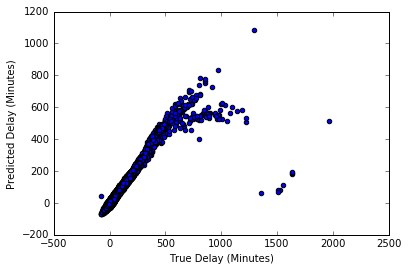

In [8]:
y_arr_pred = arrival_model.predict(X_test)
plt.figure()
plt.xlabel("True Delay (Minutes)")
plt.ylabel("Predicted Delay (Minutes)")
plt.scatter(y_test['ARRIVAL_DELAY'], y_arr_pred)

In [9]:
arrival_model.evaluate(X_test, y_test['ARRIVAL_DELAY'], verbose=2)

3.769191681853137

In [10]:
departure_model = build_model()

In [11]:
departure_model.compile(loss='mean_absolute_error', optimizer='adam')
departure_model.fit(X_train, y_train['DEPARTURE_DELAY'], verbose=2, batch_size=1024, epochs=25)

Epoch 1/25
 - 99s - loss: 7.1411
Epoch 2/25
 - 102s - loss: 4.4536
Epoch 3/25
 - 105s - loss: 4.2672
Epoch 4/25
 - 95s - loss: 4.1589
Epoch 5/25
 - 90s - loss: 4.0863
Epoch 6/25
 - 111s - loss: 4.0285
Epoch 7/25
 - 115s - loss: 3.9976
Epoch 8/25
 - 97s - loss: 3.9821
Epoch 9/25
 - 111s - loss: 3.9632
Epoch 10/25
 - 101s - loss: 3.9358
Epoch 11/25
 - 98s - loss: 3.9203
Epoch 12/25
 - 110s - loss: 3.9068
Epoch 13/25
 - 124s - loss: 3.8994
Epoch 14/25
 - 126s - loss: 3.8995
Epoch 15/25
 - 131s - loss: 3.8754
Epoch 16/25
 - 130s - loss: 3.8693
Epoch 17/25
 - 123s - loss: 3.8692
Epoch 18/25
 - 138s - loss: 3.8509
Epoch 19/25
 - 114s - loss: 3.8480
Epoch 20/25
 - 162s - loss: 3.8421
Epoch 21/25
 - 168s - loss: 3.8242
Epoch 22/25
 - 302s - loss: 3.8245
Epoch 23/25
 - 128s - loss: 3.8298
Epoch 24/25
 - 139s - loss: 3.8109
Epoch 25/25
 - 169s - loss: 3.8161


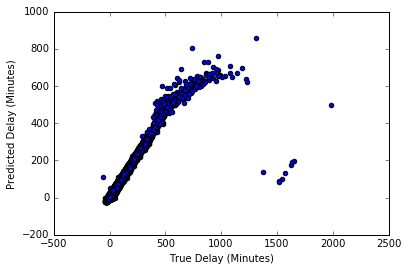

In [12]:
y_dep_pred = departure_model.predict(X_test)
plt.figure()
plt.xlabel("True Delay (Minutes)")
plt.ylabel("Predicted Delay (Minutes)")
plt.scatter(y_test['DEPARTURE_DELAY'], y_dep_pred)

In [13]:
departure_model.evaluate(X_test, y_test['DEPARTURE_DELAY'], verbose=2)

3.589627995180984

<h1>Summary</h1>

<table>
    <tr>
        <th></th>
        <th>Mean Absolute Error (Minutes)</th>
    </tr>
    <tr>
        <td>Arrival</td>
        <td>3.769191681853137</td>
    </tr>
    <tr>
        <td>Departure</td>
        <td>3.589627995180984</td>
    </tr>
</table>

In conclusion, these two models were able to predict both arrival delay and departure delay to within a mean absolute error of less than 4 minutes.